# Проект: Машинное обучение в бизнесе.

# Описание проекта

# Выбор локации для скважины

Допустим, вы работаете в добывающей компании «ГлавРосГосНефть». Нужно решить, где бурить новую скважину.

Вам предоставлены пробы нефти в трёх регионах: в каждом 10 000 месторождений, где измерили качество нефти и объём её запасов. Постройте модель машинного обучения, которая поможет определить регион, где добыча принесёт наибольшую прибыль. Проанализируйте возможную прибыль и риски техникой *Bootstrap.*

Шаги для выбора локации:

- В избранном регионе ищут месторождения, для каждого определяют значения признаков;
- Строят модель и оценивают объём запасов;
- Выбирают месторождения с самым высокими оценками значений. Количество месторождений зависит от бюджета компании и стоимости разработки одной скважины;
- Прибыль равна суммарной прибыли отобранных месторождений.

**Описание Данных.**

Данные геологоразведки трёх регионов находятся в файлах:

 - /datasets/geo_data_0.csv.
 - /datasets/geo_data_1.csv.
 - /datasets/geo_data_2.csv.

- **id** — уникальный идентификатор скважины;

- **f0, f1, f2** — три признака точек (неважно, что они означают, но сами признаки значимы);

- **product** — объём запасов в скважине (тыс. баррелей)

**Условия задачи:**

 - Для обучения модели подходит только линейная регрессия (остальные — недостаточно предсказуемые).
 
 - При разведке региона исследуют 500 точек, из которых с помощью машинного обучения выбирают 200 лучших для разработки.

 - Бюджет на разработку скважин в регионе — 10 млрд рублей.

 - При нынешних ценах один баррель сырья приносит 450 рублей дохода. Доход с каждой единицы продукта составляет 450 тыс. рублей, поскольку объём указан в тысячах баррелей.

 - После оценки рисков нужно оставить лишь те регионы, в которых вероятность убытков меньше 2.5%. Среди них выбирают регион с наибольшей средней прибылью.

**План работы.**

Загрузите и подготовьте данные. Поясните порядок действий.

Обучите и проверьте модель для каждого региона:

 - 2.1. Разбейте данные на обучающую и валидационную выборки в соотношении 75:25.
 - 2.2. Обучите модель и сделайте предсказания на валидационной выборке.
 - 2.3. Сохраните предсказания и правильные ответы на валидационной выборке.
 - 2.4. Напечатайте на экране средний запас предсказанного сырья и RMSE модели.
 - 2.5. Проанализируйте результаты.
 
Подготовьтесь к расчёту прибыли:

 - 3.1. Все ключевые значения для расчётов сохраните в отдельных переменных.
 - 3.2. Рассчитайте достаточный объём сырья для безубыточной разработки новой скважины. Сравните полученный объём сырья со средним запасом в каждом регионе. 
 - 3.3. Напишите выводы по этапу подготовки расчёта прибыли.
 
Напишите функцию для расчёта прибыли по выбранным скважинам и предсказаниям модели:


 - 4.1. Выберите скважины с максимальными значениями предсказаний. 
 - 4.2. Просуммируйте целевое значение объёма сырья, соответствующее этим предсказаниям.
 - 4.3. Рассчитайте прибыль для полученного объёма сырья.
 
Посчитайте риски и прибыль для каждого региона:

 - 5.1. Примените технику Bootstrap с 1000 выборок, чтобы найти распределение прибыли.
 - 5.2. Найдите среднюю прибыль, 95%-й доверительный интервал и риск убытков. Убыток — это отрицательная прибыль.
 - 5.3. Напишите выводы: предложите регион для разработки скважин и обоснуйте выбор.

## Загрузка и подготовка данных

### Загрузим и изучим данные.

**Импортируем нужные библиотеки.**

In [1]:
#Импортируем библиотеку pandas
import pandas as pd
#Импортируем библиотеку matplotlib
import matplotlib.pyplot as plt
#Импортируем библиотеку seaborn
import seaborn as sns
#Импортируем библиотеку numpy
import numpy as np
#Импортируем библиотеку sklearn
!pip install scikit-learn==1.5.1 -q
import sklearn
#Импортируем классы для подготовки данных
from sklearn.preprocessing import StandardScaler

from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

import warnings
warnings.filterwarnings('ignore')

**Считаем данные из csv-файлов в датафреймы и сохраним в переменные.**

In [2]:
try:
    data_0 = pd.read_csv('/datasets/geo_data_0.csv')
except:
    data_0 = pd.read_csv('https://code.s3.yandex.net/datasets/geo_data_0.csv')
    print('Таблица /datasets/geo_data_0.csv не была загружена')
    
try:
    data_1 = pd.read_csv('/datasets/geo_data_1.csv')
except:
    data_1 = pd.read_csv('https://code.s3.yandex.net/datasets/geo_data_1.csv')
    print('Таблица /datasets/geo_data_1.csv не была загружена')
    
try:
    data_2 = pd.read_csv('/datasets/geo_data_2.csv')
except:
    data_2 = pd.read_csv('https://code.s3.yandex.net/datasets/geo_data_2.csv')
    print('Таблица /datasets/geo_data_2.csv не была загружена')

**Выведем первые 5 строк датасетов data_0, data_1, data_2 и информацию о них.**

In [3]:
#Сделаем обзор датасета data_0
display(data_0.shape)
display(data_0.info())
data_0.head()

(100000, 5)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       100000 non-null  object 
 1   f0       100000 non-null  float64
 2   f1       100000 non-null  float64
 3   f2       100000 non-null  float64
 4   product  100000 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB


None

,id,f0,f1,f2,product
0,txEyH,0.705745,-0.497823,1.221170,105.280062
1,2acmU,1.334711,-0.340164,4.365080,73.037750
2,409Wp,1.022732,0.151990,1.419926,85.265647
3,iJLyR,-0.032172,0.139033,2.978566,168.620776
4,Xdl7t,1.988431,0.155413,4.751769,154.036647


In [4]:
#Сделаем обзор датасета data_1
display(data_1.shape)
display(data_1.info())
data_1.head()

(100000, 5)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       100000 non-null  object 
 1   f0       100000 non-null  float64
 2   f1       100000 non-null  float64
 3   f2       100000 non-null  float64
 4   product  100000 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB


None

,id,f0,f1,f2,product
0,kBEdx,-15.001348,-8.276000,-0.005876,3.179103
1,62mP7,14.272088,-3.475083,0.999183,26.953261
2,vyE1P,6.263187,-5.948386,5.001160,134.766305
3,KcrkZ,-13.081196,-11.506057,4.999415,137.945408
4,AHL4O,12.702195,-8.147433,5.004363,134.766305


In [5]:
#Сделаем обзор датасета data_2
display(data_2.shape)
display(data_2.info())
data_2.head()

(100000, 5)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       100000 non-null  object 
 1   f0       100000 non-null  float64
 2   f1       100000 non-null  float64
 3   f2       100000 non-null  float64
 4   product  100000 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB


None

,id,f0,f1,f2,product
0,fwXo0,-1.146987,0.963328,-0.828965,27.758673
1,WJtFt,0.262778,0.269839,-2.530187,56.069697
2,ovLUW,0.194587,0.289035,-5.586433,62.871910
3,q6cA6,2.236060,-0.553760,0.930038,114.572842
4,WPMUX,-0.515993,1.716266,5.899011,149.600746


**Сделаем выводы по обзору данных:**

 - В исследовани участвует три датасета.
 - Во всех датасетах одинаковое число строк и столбцов.
 - В датасетах не обнаружено пропусков.
 - В датасетах не обнаружено неправильных типов данных.
 - Данные в таблицах соответствуют описанию
 - Все названия столбцов приведены к змеиному регистру.

### Предобработка данных.

**Обработаем пропуски.**

Из предварительного обзора данных мы знаем, что в датасетах нет пропусков. Но значения "пробел"(' ') возможны в столбцах типа 'object', которым представлен столбец 'id' во всех датасетах. Проверим, есть ли "пробел"(' ') в этих столбцах.

In [6]:
#Проверим data_0 на наличие пробела
space_0 = data_0[data_0['id'].str.contains(' ')]
space_0

,id,f0,f1,f2,product


In [7]:
#Проверим data_1 на наличие пробела
space_1 = data_1[data_1['id'].str.contains(' ')]
space_1

,id,f0,f1,f2,product


In [8]:
#Проверим data_2 на наличие пробела
space_2 = data_2[data_2['id'].str.contains(' ')]
space_2

,id,f0,f1,f2,product


**Найдем явные дубликаты.**

In [9]:
#Посчитаем явные дубликаты
print('Количество явных дубликатов data_0:', data_0.duplicated().sum())
print('Количество явных дубликатов data_1:', data_1.duplicated().sum())
print('Количество явных дубликатов data_2:', data_2.duplicated().sum())

Количество явных дубликатов data_0: 0
Количество явных дубликатов data_1: 0
Количество явных дубликатов data_2: 0


**Найдем неявные дубликаты.**

В столбце 'id' не должно быть дубликатов, так как каждый элемент в столбце 'id' - уникальный идентификатор скважины.

**Рассмотрим дубликаты в столбце 'id' датасета data_0.**

In [10]:
#Вынесем все дублированные id в отдельный датасет
dt_0_dup = data_0[data_0['id'].duplicated()]
display(dt_0_dup)

#Удалим дублированные id из датасета data_0
data_0 = data_0.drop(dt_0_dup.index, axis=0)
data_0.info()
display(data_0.shape)

,id,f0,f1,f2,product
7530,HZww2,1.061194,-0.373969,10.430210,158.828695
41724,bxg6G,-0.823752,0.546319,3.630479,93.007798
51970,A5aEY,-0.180335,0.935548,-2.094773,33.020205
63593,QcMuo,0.635635,-0.473422,0.862670,64.578675
66136,74z30,1.084962,-0.312358,6.990771,127.643327
69163,AGS9W,-0.933795,0.116194,-3.655896,19.230453
75715,Tdehs,0.112079,0.430296,3.218993,60.964018
90815,fiKDv,0.049883,0.841313,6.394613,137.346586
92341,TtcGQ,0.110711,1.022689,0.911381,101.318008
97785,bsk9y,0.378429,0.005837,0.160827,160.637302


<class 'pandas.core.frame.DataFrame'>
Int64Index: 99990 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   id       99990 non-null  object 
 1   f0       99990 non-null  float64
 2   f1       99990 non-null  float64
 3   f2       99990 non-null  float64
 4   product  99990 non-null  float64
dtypes: float64(4), object(1)
memory usage: 4.6+ MB


(99990, 5)

**Рассмотрим дубликаты в столбце 'id' датасета data_1.**

In [11]:
#Вынесем все дублированные id в отдельный датасет
dt_1_dup = data_1[data_1['id'].duplicated()]
display(dt_1_dup)

#Удалим дублированные id из датасета data_1
data_1 = data_1.drop(dt_1_dup.index, axis=0)
data_1.info()
display(data_1.shape)

,id,f0,f1,f2,product
41906,LHZR0,-8.989672,-4.286607,2.009139,57.085625
82178,bfPNe,-6.202799,-4.820045,2.995107,84.038886
82873,wt4Uk,10.259972,-9.376355,4.994297,134.766305
84461,5ltQ6,18.213839,2.191999,3.993869,107.813044


<class 'pandas.core.frame.DataFrame'>
Int64Index: 99996 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   id       99996 non-null  object 
 1   f0       99996 non-null  float64
 2   f1       99996 non-null  float64
 3   f2       99996 non-null  float64
 4   product  99996 non-null  float64
dtypes: float64(4), object(1)
memory usage: 4.6+ MB


(99996, 5)

**Рассмотрим дубликаты в столбце 'id' датасета data_2.**

In [12]:
#Вынесем все дублированные id в отдельный датасет
dt_2_dup = data_2[data_2['id'].duplicated()]
display(dt_2_dup)

#Удалим дублированные id из датасета data_2
data_2 = data_2.drop(dt_2_dup.index, axis=0)
data_2.info()
display(data_2.shape)

,id,f0,f1,f2,product
43233,xCHr8,-0.847066,2.101796,5.597130,184.388641
49564,VF7Jo,-0.883115,0.560537,0.723601,136.233420
55967,KUPhW,1.211150,3.176408,5.543540,132.831802
95090,Vcm5J,2.587702,1.986875,2.482245,92.327572


<class 'pandas.core.frame.DataFrame'>
Int64Index: 99996 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   id       99996 non-null  object 
 1   f0       99996 non-null  float64
 2   f1       99996 non-null  float64
 3   f2       99996 non-null  float64
 4   product  99996 non-null  float64
dtypes: float64(4), object(1)
memory usage: 4.6+ MB


(99996, 5)

**Сделаем выводы по предобработке данных.**

 - Не было обнаружено строк со значением "пробел"(' ') в столбцах 'id' датасетов data_0, data_1 и data_2.
 - Явных дубликатов обнаружено не было.
 - Были обнаружены и удалены неявные дубликаты в столбцах 'id'.

### Исследовательский анализ данных.

In [13]:
#Напишем функцию для построения распределений признаков датасетов
def distribution(data, fx):
    data[fx].plot(kind='box', grid=True)
    plt.show()

    display(data[fx].describe())

    data[fx].plot(kind='hist', grid=True, bins=30)
    plt.title(f'Распределение признака {fx}')
    plt.xlabel(f'Распределение {fx}')
    plt.ylabel(f'Величина значений {fx}')

**Исследуем каждый значимый признак датасета data_0 в отдельности.**

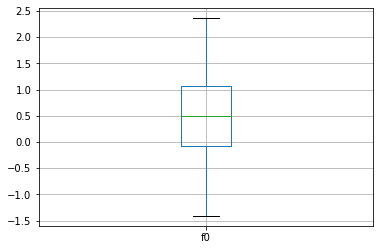

count    99990.000000
mean         0.500454
std          0.871844
min         -1.408605
25%         -0.072572
50%          0.502405
75%          1.073626
max          2.362331
Name: f0, dtype: float64

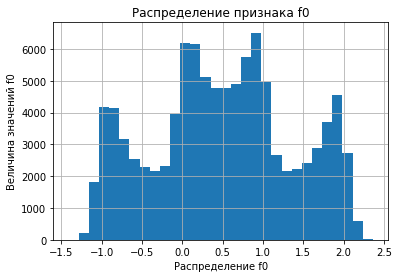

In [14]:
#Построим распределение и удалим аномальные значения для столбца 'f0'
distribution(data_0, 'f0')

**Вывод:** Аномальных значений не обнаружено. Все значения укладываются в 3 межквартильных размаха "ящика с усами". Медианное значение f0 равно 0.502405. Распределение значений имеет вид отличный от нормального.

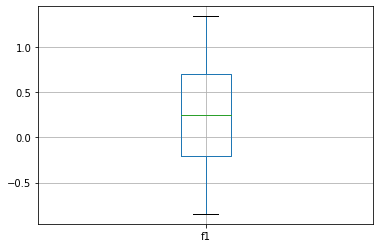

count    99990.000000
mean         0.250141
std          0.504430
min         -0.848218
25%         -0.200877
50%          0.250252
75%          0.700640
max          1.343769
Name: f1, dtype: float64

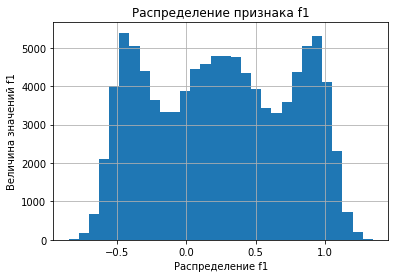

In [15]:
#Построим распределение и удалим аномальные значения для столбца 'f1'
distribution(data_0, 'f1')

**Вывод:** Аномальных значений не обнаружено. Все значения укладываются в 3 межквартильных размаха "ящика с усами". Медианное значение f1 равно 0.250252. Распределение значений имеет вид отличный от нормального.

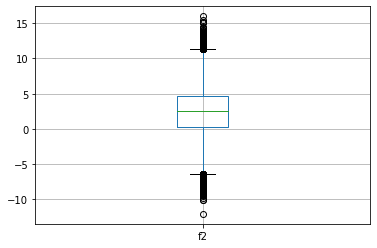

count    99990.000000
mean         2.502629
std          3.248149
min        -12.088328
25%          0.287784
50%          2.515969
75%          4.715035
max         16.003790
Name: f2, dtype: float64

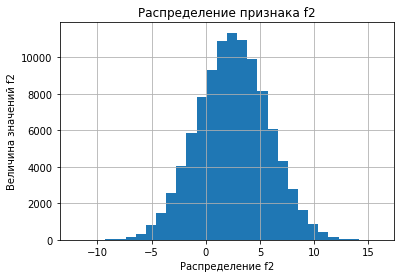

In [16]:
#Построим распределение и удалим аномальные значения для столбца 'f2'
distribution(data_0, 'f2')

**Вывод:** Обнаружены выбросы в данных, но мы не будем их удалять, так как они имеют равномерный характер, и их удаление может повредить анализу, так как их слишком много. Не все значения укладываются в 3 межквартильных размаха "ящика с усами". Медианное значение f2 равно 2.515969. Распределение значений имеет вид близкий к нормальному.

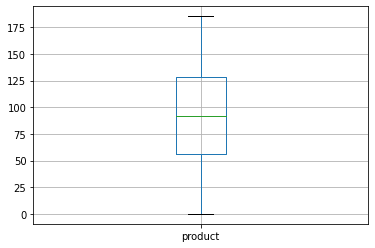

count    99990.000000
mean        92.499684
std         44.288304
min          0.000000
25%         56.497069
50%         91.847928
75%        128.563699
max        185.364347
Name: product, dtype: float64

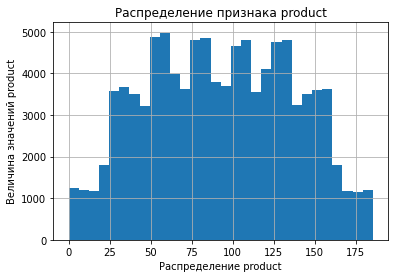

In [17]:
#Построим распределение и удалим аномальные значения для столбца 'product'
distribution(data_0, 'product')

**Вывод:** Аномальных значений не обнаружено. Все значения укладываются в 3 межквартильных размаха "ящика с усами". Медианное значение product равно 91.847928. Распределение значений имеет вид отличный от нормального.

**Исследуем каждый значимый признак датасета data_1 в отдельности.**

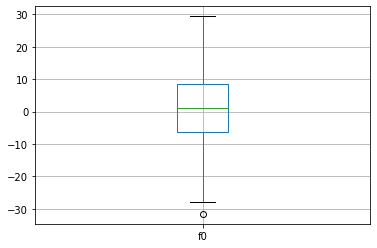

count    99996.000000
mean         1.141209
std          8.965815
min        -31.609576
25%         -6.298551
50%          1.153055
75%          8.620964
max         29.421755
Name: f0, dtype: float64

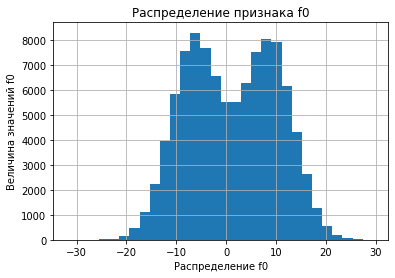

In [18]:
#Построим распределение и удалим аномальные значения для столбца 'f0'
distribution(data_1, 'f0')

**Вывод:** Аномальных значений не обнаружено. Все значения укладываются в 3 межквартильных размаха "ящика с усами". Медианное значение f0 равно 1.153055. Распределение значений имеет вид отличный от нормального.

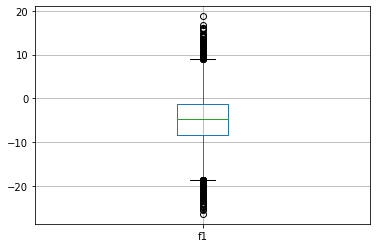

count    99996.000000
mean        -4.796608
std          5.119906
min        -26.358598
25%         -8.267985
50%         -4.813172
75%         -1.332816
max         18.734063
Name: f1, dtype: float64

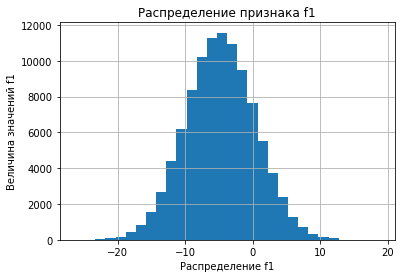

In [19]:
#Построим распределение и удалим аномальные значения для столбца 'f1'
distribution(data_1, 'f1')

**Вывод:** Обнаружены выбросы в данных, но мы не будем их удалять, так как они имеют равномерный характер, и их удаление может повредить анализу, так как их слишком много. Не все значения укладываются в 3 межквартильных размаха "ящика с усами". Медианное значение f1 равно -4.813172. Распределение значений имеет вид близкий к нормальному.

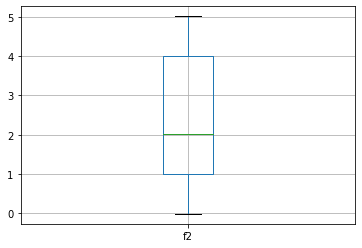

count    99996.000000
mean         2.494501
std          1.703579
min         -0.018144
25%          1.000021
50%          2.011475
75%          3.999904
max          5.019721
Name: f2, dtype: float64

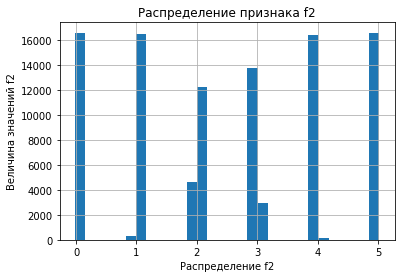

In [20]:
#Построим распределение и удалим аномальные значения для столбца 'f2'
distribution(data_1, 'f2')

**Вывод**: Аномальных значений не обнаружено. Все значения укладываются в 3 межквартильных размаха "ящика с усами". Медианное значение f2 равно 2.011475. Распределение значений имеет вид отличный от нормального.

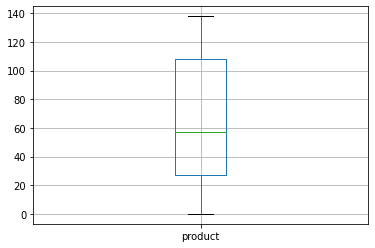

count    99996.000000
mean        68.823916
std         45.944663
min          0.000000
25%         26.953261
50%         57.085625
75%        107.813044
max        137.945408
Name: product, dtype: float64

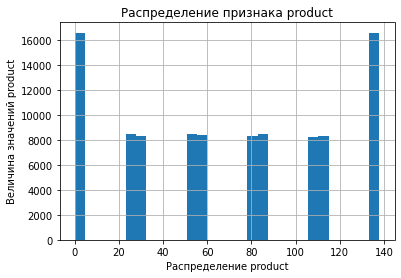

In [21]:
#Построим распределение и удалим аномальные значения для столбца 'product'
distribution(data_1, 'product')

**Вывод:** Аномальных значений не обнаружено. Все значения укладываются в 3 межквартильных размаха "ящика с усами". Медианное значение product равно 57.085625. Распределение значений имеет вид отличный от нормального.

**Исследуем каждый значимый признак датасета data_2 в отдельности.**

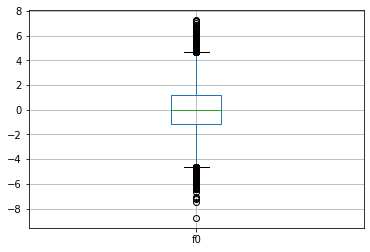

count    99996.000000
mean         0.002002
std          1.732052
min         -8.760004
25%         -1.162328
50%          0.009424
75%          1.158477
max          7.238262
Name: f0, dtype: float64

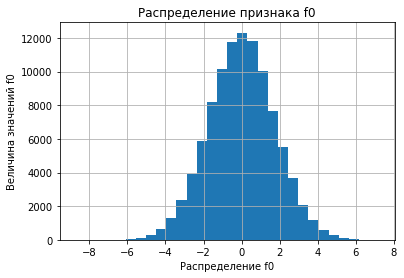

In [22]:
#Построим распределение и удалим аномальные значения для столбца 'f0'
distribution(data_2, 'f0')

**Вывод:** Обнаружены выбросы в данных, но мы не будем их удалять, так как они имеют равномерный характер, и их удаление может повредить анализу, так как их слишком много. Не все значения укладываются в 3 межквартильных размаха "ящика с усами". Медианное значение f0 равно 0.009424. Распределение значений имеет вид близкий к нормальному. Мода распределения находится близко к нулю.

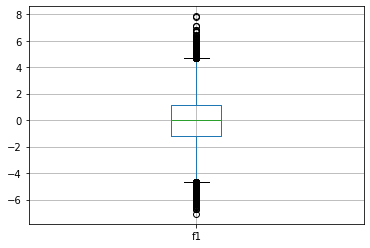

count    99996.000000
mean        -0.002159
std          1.730397
min         -7.084020
25%         -1.174841
50%         -0.009661
75%          1.163523
max          7.844801
Name: f1, dtype: float64

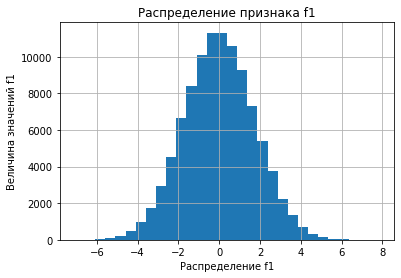

In [23]:
#Построим распределение и удалим аномальные значения для столбца 'f1'
distribution(data_2, 'f1')

**Вывод:** Обнаружены выбросы в данных, но мы не будем их удалять, так как они имеют равномерный характер, и их удаление может повредить анализу, так как их слишком много. Не все значения укладываются в 3 межквартильных размаха "ящика с усами". Медианное значение f1 равно -0.009661. Распределение значений имеет вид близкий к нормальному. Мода распределения находится близко к нулю.

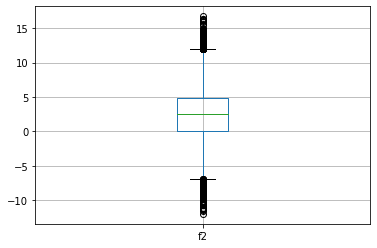

count    99996.000000
mean         2.495084
std          3.473482
min        -11.970335
25%          0.130269
50%          2.484236
75%          4.858720
max         16.739402
Name: f2, dtype: float64

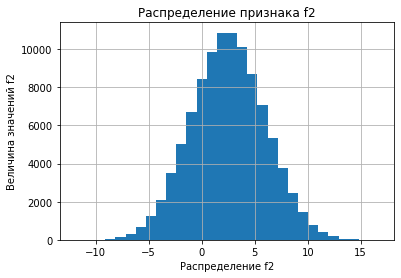

In [24]:
#Построим распределение и удалим аномальные значения для столбца 'f2'
distribution(data_2, 'f2')

Вывод: Обнаружены выбросы в данных, но мы не будем их удалять, так как они имеют равномерный характер, и их удаление может повредить анализу, так как их слишком много. Не все значения укладываются в 3 межквартильных размаха "ящика с усами". Медианное значение f2 равно 2.484236. Распределение значений имеет вид близкий к нормальному.

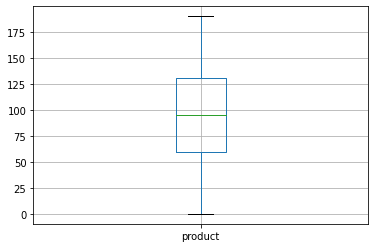

count    99996.000000
mean        94.998342
std         44.749573
min          0.000000
25%         59.450028
50%         94.925026
75%        130.586815
max        190.029838
Name: product, dtype: float64

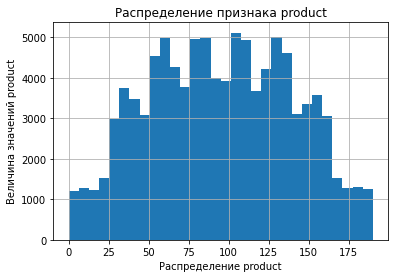

In [25]:
#Построим распределение и удалим аномальные значения для столбца 'product'
distribution(data_2, 'product')

**Вывод:** Аномальных значений не обнаружено. Все значения укладываются в 3 межквартильных размаха "ящика с усами". Медианное значение product равно 94.925026. Распределение значений имеет вид отличный от нормального.

**Оформим общий вывод по результатам шага.**

**Вывод:** Некоторые входные признаки в датасетах наспределены не нормально. В датасетах почти нет аномальных значений. Были обнаружены выбросы в данных в небольших диапазонах значений, но мы не будем их убирать.

### Корреляционный анализ.

**Проведем корреляционный анализ данных в датасете data_0.**

,f0,f1,f2,product
f0,1.000000,-0.471379,-0.002739,0.128379
f1,-0.471379,1.000000,0.001440,-0.181136
f2,-0.002739,0.001440,1.000000,0.486370
product,0.128379,-0.181136,0.486370,1.000000


<AxesSubplot:>

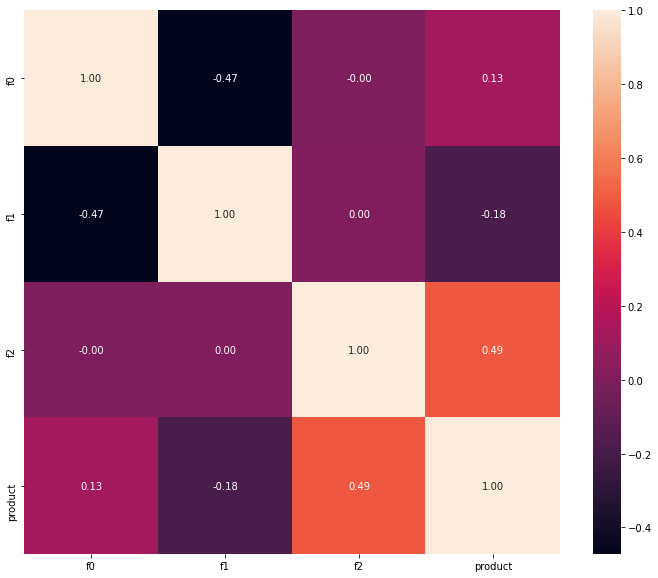

In [26]:
#Измерим корреляцию между признаками в датасете data_0
#Уберем столбец 'id'
data_0_corr = data_0.drop('id', axis=1)
#Используем корреляцию Спирмана, так как не все признаки распределены нормально
data_0_corr = data_0_corr.corr(method='spearman')
display(data_0_corr)
plt.figure(figsize=(12, 10))
sns.heatmap(data_0_corr, annot=True, fmt='.2f')

**Вывод:**

Мы обнаружили среднюю корреляцию между параметрами:
 - 'f1' и 'f0' = -0.47.
 - 'product' и 'f2' = 0.49.
 
Так же существует низкая корреляция между параметрами:
 - 'product' и 'f0' = 0.13.
 - 'product' и 'f2' = -0.18.
 
Между остальными параметрами корреляции нет.

**Проведем корреляционный анализ данных в датасете data_1.**

,f0,f1,f2,product
f0,1.000000,0.182247,-0.002024,-0.122901
f1,0.182247,1.000000,-0.003674,-0.033906
f2,-0.002024,-0.003674,1.000000,0.975604
product,-0.122901,-0.033906,0.975604,1.000000


<AxesSubplot:>

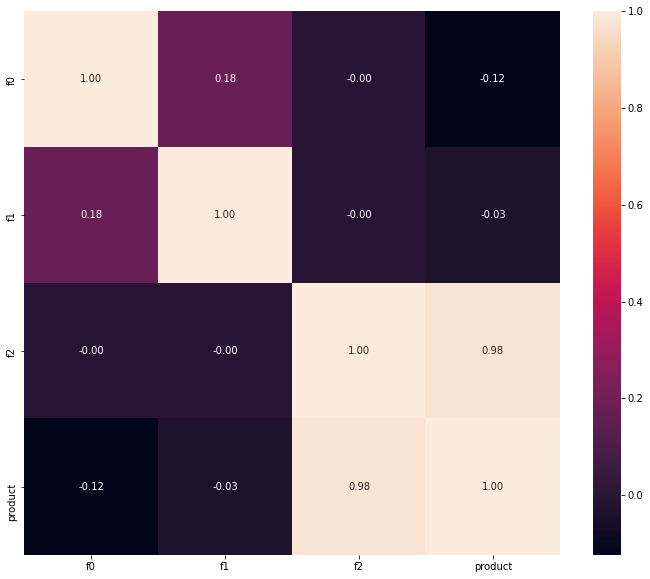

In [27]:
#Измерим корреляцию между признаками в датасете data_1
#Уберем столбец 'id'
data_1_corr = data_1.drop('id', axis=1)
#Используем корреляцию Спирмана, так как не все признаки распределены нормально
data_1_corr = data_1_corr.corr(method='spearman')
display(data_1_corr)
plt.figure(figsize=(12, 10))
sns.heatmap(data_1_corr, annot=True, fmt='.2f')

**Вывод:**

Мы обнаружили очень высокую степень корреляции между параметрами:
 - 'product' и 'f2' = 0.98.
 
Так же существует низкая корреляция между параметрами:
 - 'f1' и 'f0' = 0.18.
 - 'product' и 'f0' = -0.12.
 
Между остальными параметрами корреляции нет.

**Проведем корреляционный анализ данных в датасете data_2.**

,f0,f1,f2,product
f0,1.000000,0.002471,0.000046,-0.002453
f1,0.002471,1.000000,0.000349,-0.001508
f2,0.000046,0.000349,1.000000,0.448459
product,-0.002453,-0.001508,0.448459,1.000000


<AxesSubplot:>

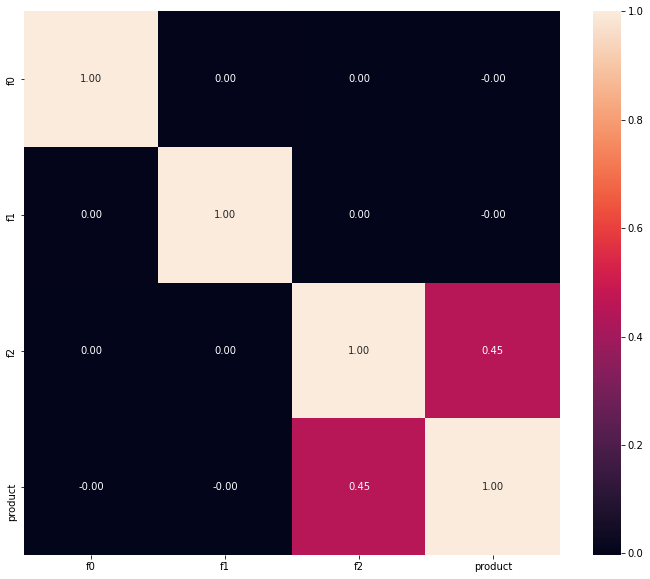

In [28]:
#Измерим корреляцию между признаками в датасете data_2
#Уберем столбец 'id'
data_2_corr = data_2.drop('id', axis=1)
#Используем корреляцию Спирмана, так как не все признаки распределены нормально
data_2_corr = data_2_corr.corr(method='spearman')
display(data_2_corr)
plt.figure(figsize=(12, 10))
sns.heatmap(data_2_corr, annot=True, fmt='.2f')

**Вывод:**

Мы обнаружили среднюю степень корреляции между параметрами:
 - 'product' и 'f2' = 0.45.
 
Между остальными параметрами корреляции нет.

## Обучение и проверка модели

### Подготовка признаков.

**Напишем функцию для выделения признаков и разбиения данных на выборки.**

In [29]:
scaler = StandardScaler()

In [30]:
def tr_te_sp_dt(data, size=0.25, rand=12345):
    features = data.drop(['id','product'], axis=1)
    target = data['product']
    
    features_train, features_valid, target_train, target_valid = train_test_split(features, target, 
                                                                                  test_size=size, random_state=rand)
    scaler.fit(features_train)
    
    features_train = pd.DataFrame(scaler.transform(features_train), index=target_train)
    
    features_valid = pd.DataFrame(scaler.transform(features_valid), index=target_valid)
    
    return features_train, features_valid, target_train, target_valid  

In [31]:
#Первое месторождение data_0
features_train_data_0, features_valid_data_0, target_train_data_0, target_valid_data_0 = tr_te_sp_dt(data_0, 0.25)
print(f'Размер обучающей выборки {features_train_data_0.shape}')
print(f'Размер тестовой выборки {features_valid_data_0.shape}')

Размер обучающей выборки (74992, 3)
Размер тестовой выборки (24998, 3)


In [32]:
#Второе месторождение data_1
features_train_data_1, features_valid_data_1, target_train_data_1, target_valid_data_1 = tr_te_sp_dt(data_1, 0.25)
print(f'Размер обучающей выборки {features_train_data_1.shape}')
print(f'Размер тестовой выборки {features_valid_data_1.shape}')

Размер обучающей выборки (74997, 3)
Размер тестовой выборки (24999, 3)


In [33]:
#Третье месторождение data_2
features_train_data_2, features_valid_data_2, target_train_data_2, target_valid_data_2 = tr_te_sp_dt(data_2, 0.25)
print(f'Размер обучающей выборки {features_train_data_2.shape}')
print(f'Размер тестовой выборки {features_valid_data_2.shape}')

Размер обучающей выборки (74997, 3)
Размер тестовой выборки (24999, 3)


**Вывод:** 
 - Данные подготовлены для дальнейшей работы с ними.
 - Размеры выборок соответствуют нашим ожиданиям.

### Обучение моделей.

In [34]:
model = LinearRegression()

Обучим модели на данных каждого месторождения. В начале создадим словарь, для удобства восприятия. В дальнейшем создадим из него датасет.

In [35]:
rmse_dict = {'mean_true':[], 'mean_pred':[], 'rmse':[]}

Создадим функцию для обучения модели, расчета среднего значения предсказаний и rmse.

In [36]:
def rmse_dt(pred, target, model):
    mean_true = target.mean()
    mean_pred = pred.mean()
    rmse = mean_squared_error(target, pred, squared=False)
    return mean_true, mean_pred, rmse

Рассчитаем среднее значение предсказаний и rmse для всех трех регионов.

In [37]:
model_0 = model.fit(features_train_data_0, target_train_data_0)
prediction_0 = pd.Series(model_0.predict(features_valid_data_0), index=target_valid_data_0.index)

mean_true_0, mean_pred_0, rmse_0 = rmse_dt(prediction_0, target_valid_data_0, model_0)

rmse_dict['mean_true'].append(mean_true_0)
rmse_dict['mean_pred'].append(mean_pred_0)
rmse_dict['rmse'].append(rmse_0)

In [38]:
model_1 = model.fit(features_train_data_1, target_train_data_1)
prediction_1 = pd.Series(model_1.predict(features_valid_data_1), index=target_valid_data_1.index)

mean_true_1, mean_pred_1, rmse_1 = rmse_dt(prediction_1, target_valid_data_1, model_1)

rmse_dict['mean_true'].append(mean_true_1)
rmse_dict['mean_pred'].append(mean_pred_1)
rmse_dict['rmse'].append(rmse_1)

In [39]:
model_2 = model.fit(features_train_data_2, target_train_data_2)
prediction_2 = pd.Series(model_2.predict(features_valid_data_2), index=target_valid_data_2.index)

mean_true_2, mean_pred_2, rmse_2 = rmse_dt(prediction_2, target_valid_data_2, model_2)

rmse_dict['mean_true'].append(mean_true_2)
rmse_dict['mean_pred'].append(mean_pred_2)
rmse_dict['rmse'].append(rmse_2)

### Сохраним предсказания и правильные ответы на валидационной выборке.

In [40]:
all_data = pd.DataFrame(rmse_dict, index=['data_0', 'data_1', 'data_2'])

### Напечатаем на экране средний запас предсказанного сырья и RMSE модели.

In [41]:
all_data

,mean_true,mean_pred,rmse
data_0,92.158205,92.789156,37.853527
data_1,69.186044,69.178320,0.892059
data_2,94.785109,94.865725,40.075851


### Проанализируем результаты.

**Вывод:**
 - Мы обучили три модели для трех регионов и предсказали целевые признаки.
 - Была получена метрика RMSE.
 - Метрика RMSE в первом и третьем регионах значительно выше, чем во втором регионе (~39).
 - Во втором регионе метрика RMSE равна ~0.9.
 - Во втором регионе предсказанное среднее ниже чем в первом и третьем - 69 против ~94.

## Подготовка к расчёту прибыли

### Все ключевые значения для расчётов сохраните в отдельных переменных.

In [42]:
#Бюджет на разработку скважин в регионе
BUDGET = 10 ** 10
#Количесвто точек, исследуемых при разведке
QUANTITY_PIV = 500
#Количесвто лучших точек, выбранных для разработки
BEST_PIV = 200
#Цена тысячи баррелей нефти
BAR_1000 = 450000

### Рассчитаем достаточный объём сырья для безубыточной разработки новой скважины. Сравним полученный объём сырья со средним запасом в каждом регионе.

In [43]:
volume_raw_mat = BUDGET / (BEST_PIV * BAR_1000)
print(f'Объем для безубыточной разработки новой скважины: {volume_raw_mat}')

Объем для безубыточной разработки новой скважины: 111.11111111111111


Объем для безубыточной разработки новой скважины больше среднего количества сырья на скважину во всех трех регионах.

### Напишем выводы по этапу подготовки расчёта прибыли.

**Вывод:**
 - Мы посчитали объем для безубыточной разработки новой скважины, он оказался выше средних запасов нефти во всех регионах.
 - У нас в данных несколько тысяч точек, хотя компания может разведать 500 точек и выбрать из них 200 лучших, поэтому средний запас может быть больше объема для безубыточной разработки у 200 лучших точек.

## Расчёт прибыли и рисков 

**Напишем функцию для расчёта прибыли по выбранным скважинам и предсказаниям модели.**

In [44]:
def profit(target, probab, count, prise):
    
    probs_sorted = probab.sort_values(ascending=False)
    selected = target[probs_sorted.index][:count]
    
    return prise * selected.sum() - BUDGET

## Применим технику Bootstrap с 1000 выборок, чтобы найти распределение прибыли.

In [45]:
state = np.random.RandomState(12345)

In [46]:
def bootstrap(target, valid, count, state):
    values = []
    for i in range(1000):
        target_subsample = target.sample(n=count, replace=True, random_state=state)
        probs_subsample = valid[target_subsample.index]
        x = profit(target_subsample, probs_subsample, BEST_PIV, BAR_1000)
        values.append(x)
        
    values = pd.Series(values)
    return values

**Рассчитаем средную прибыль для 1000 различных вариантов разведки в первом регионе:**

In [47]:
val_0 = bootstrap(target_valid_data_0, prediction_0, QUANTITY_PIV, state)

mean_0 = val_0.mean()
min_0 = val_0.quantile(0.025)
max_0 = val_0.quantile(0.975)
risk_0 = (val_0 < 0).mean() * 100

print("Средняя выручка:", mean_0)
print("Доверительный интервал (95%):", [min_0, max_0])
print("Риск убытков в %:", risk_0)

Средняя выручка: 409428038.62143606
Доверительный интервал (95%): [-131536028.70166382, 944395582.7546725]
Риск убытков в %: 7.1


**Рассчитаем средную прибыль для 1000 различных вариантов разведки во втором регионе:**

In [48]:
val_1 = bootstrap(target_valid_data_1, prediction_1, QUANTITY_PIV, state)

mean_1 = val_1.mean()
min_1 = val_1.quantile(0.025)
max_1 = val_1.quantile(0.975)
risk_1 = (val_1 < 0).mean() * 100

print("Средняя выручка:", mean_1)
print("Доверительный интервал (95%):", [min_1, max_1])
print("Риск убытков в %:", risk_1)

Средняя выручка: 536400199.43510306
Доверительный интервал (95%): [112954247.12370124, 998504156.6468805]
Риск убытков в %: 0.3


**Рассчитаем средную прибыль для 1000 различных вариантов разведки в третьем регионе:**

In [49]:
val_2 = bootstrap(target_valid_data_2, prediction_2, QUANTITY_PIV, state)

mean_2 = val_2.mean()
min_2 = val_2.quantile(0.025)
max_2 = val_2.quantile(0.975)
risk_2 = (val_2 < 0).mean() * 100

print("Средняя выручка:", mean_2)
print("Доверительный интервал (95%):", [min_2, max_2])
print("Риск убытков в %:", risk_2)

Средняя выручка: 339478034.1977997
Доверительный интервал (95%): [-224089221.7440758, 847067587.6863929]
Риск убытков в %: 11.799999999999999


**Создадим датасет с всеми найденными характеристиками месторождений.**

In [50]:
result_dict = {'Минимальная выручка':[min_0, min_1, min_2], 
              'Средняя выручка':[mean_0, mean_1, mean_2],
              'Максимальна выручка':[max_0, max_1, max_2],
              'Риск убытков в %' : [risk_0, risk_1, risk_2]}
index = ['Первый регион', 'Второй регион', 'Третий регион']
result_data = pd.DataFrame(data=result_dict, index=index)

In [51]:
result_data

,Минимальная выручка,Средняя выручка,Максимальна выручка,Риск убытков в %
Первый регион,-1.315360e+08,4.094280e+08,9.443956e+08,7.1
Второй регион,1.129542e+08,5.364002e+08,9.985042e+08,0.3
Третий регион,-2.240892e+08,3.394780e+08,8.470676e+08,11.8


## Общий вывод.

**Сделаем общий вывод по проделанному исследованию.**

Мы исследовали три датасета с регионами для разработки скважин. Мы искали регион с наиболее подходящими для разработки скважинами, опираясь на риск убытков и выработку нефти.

Сделаем выводы по обзору данных:

- В исследовани участвует три датасета.
- Во всех датасетах одинаковое число строк и столбцов.
- В датасетах не обнаружено пропусков.
- В датасетах не обнаружено неправильных типов данных.
- Данные в таблицах соответствуют описанию
- Все названия столбцов приведены к змеиному регистру.

Сделаем выводы по предобработке данных.

- Не было обнаружено строк со значением "пробел"(' ') в столбцах 'id' датасетов data_0, data_1 и data_2.
- Явных дубликатов обнаружено не было.
- Были обнаружены и удалены неявные дубликаты в столбцах 'id'.

Сделаем вывод по исследовательскому анализу данных:

- Некоторые входные признаки в датасетах наспределены не нормально. В датасетах почти нет аномальных значений. Были обнаружены выбросы в данных в небольших диапазонах значений, но мы не будем их убирать.

Сделаем выводы по подготовке к расчёту прибыли:

- Мы посчитали объем для безубыточной разработки новой скважины, он оказался выше средних запасов нефти во всех регионах.
- У нас в данных несколько тысяч точек, хотя компания может разведать 500 точек и выбрать из них 200 лучших, поэтому средний запас может быть больше объема для безубыточной разработки у 200 лучших точек.

In [52]:
result_data

,Минимальная выручка,Средняя выручка,Максимальна выручка,Риск убытков в %
Первый регион,-1.315360e+08,4.094280e+08,9.443956e+08,7.1
Второй регион,1.129542e+08,5.364002e+08,9.985042e+08,0.3
Третий регион,-2.240892e+08,3.394780e+08,8.470676e+08,11.8


Исходя из проведенного нами исследования можно сделать вывод, что наилучшим регионом для разработки является **второй регион**.

Это обосновывается тем, что:

- Минимальная выручка во втором регионе - положительная.
- Средняя выручка во втором регионе выше, чем в остальных.
- Максимальная выручка во втором регионе выше, чем в остальных.
- Риск убытков во втором регионе сильно меньше, чем в первом и третьем - 0.3% против 7.1% в первом, и 11.8% в третьем.


Поставьте 'x' в выполненных пунктах. Далее нажмите Shift+Enter.

- [x]  Jupyter Notebook открыт
- [x]  Весь код выполняется без ошибок
- [x]  Ячейки с кодом расположены в порядке исполнения
- [x]  Выполнен шаг 1: данные подготовлены
- [x]  Выполнен шаг 2: модели обучены и проверены
    - [x]  Данные корректно разбиты на обучающую и валидационную выборки
    - [x]  Модели обучены, предсказания сделаны
    - [x]  Предсказания и правильные ответы на валидационной выборке сохранены
    - [x]  На экране напечатаны результаты
    - [x]  Сделаны выводы
- [x]  Выполнен шаг 3: проведена подготовка к расчёту прибыли
    - [x]  Для всех ключевых значений созданы константы Python
    - [x]  Посчитано минимальное среднее количество продукта в месторождениях региона, достаточное для разработки
    - [x]  По предыдущему пункту сделаны выводы
    - [x]  Написана функция расчёта прибыли
- [x]  Выполнен шаг 4: посчитаны риски и прибыль
    - [x]  Проведена процедура *Bootstrap*
    - [x]  Все параметры бутстрепа соответствуют условию
    - [x]  Найдены все нужные величины
    - [x]  Предложен регион для разработки месторождения
    - [x]  Выбор региона обоснован

<div class="alert alert-block alert-warning">
<b>Спасибо за ревью.</b>
</div>